In [1]:
from auto_drive_functions import retrieve_angle ,perform_3sig
from PIL import Image,ImageOps,ImageFilter
from ImageFrame import Frame
import timeit as ti
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from EdgeFinder import EdgeFinder as ef 

In [2]:
frame1 = Frame(640,480,30)


load CVS file successfully


(4, 2)


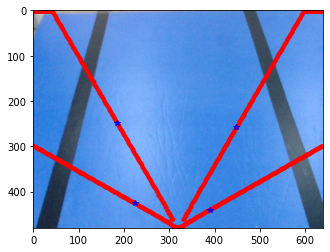

In [9]:
img = np.array(Image.open('image/img26.jpg'))
imshow(img)
plt.axis([0.0,640,480,0.0])
data = frame1.get_data(img,2)
edges = {}
for key in data:
        edges[key] = ef(50,3,5,data[key],1).abnormal['num']
points = np.empty((0,2), float)   
for key in edges.keys():
    if not np.isnan(edges[key]):
        temp = np.flip(frame1.lines_frame[key],axis=0)
        cord = temp[edges[key]]
        points = np.append(points, [cord], axis=0)
print(points.shape)
for line in frame1.lines_frame:
        plt.plot(frame1.lines_frame[line][:,0],frame1.lines_frame[line][:,1],'r.')
plt.plot(points[:,0],points[:,1],'b*')


In [ ]:
for num in range(20,30):
    img = Image.open('image/img'+str(num)+'.jpg')
    #img = ImageOps.grayscale(img)
    #img = img.filter(ImageFilter.GaussianBlur(1))
    #starttime = ti.default_timer()
    angle = retrieve_angle(50,3,5,2,img,frame1)
    #print(ti.default_timer()-starttime)
    print(angle[2])
    points = angle[0]
    plt.axis([0.0,640,0.0,480])
    gray()
    imshow(img)
    plt.title('img'+str(num))
    plt.plot(640/2,480,'ro')
    plt.plot(points[:,0],points[:,1],'bo')
    plt.show()